In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## <a id='1'>1. Initial Look at the Data</a>

In [2]:
df_train = pd.read_csv("train.tsv/train.tsv", sep='\t')
df_train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [3]:
df_test = pd.read_csv("test.tsv/test.tsv", sep='\t')
df_test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


## <a id='1.1'>1.1 Distribution of reviews in each sentiment category</a>

Here, the training dataset has dominating neutral phrases from the movie reviews followed by somewhat positive and then somewhat negative.

In [4]:
df_train.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


## <a id='1.2'>1.2 Dropping insignificant columns</a>

In [6]:
df_train_1 = df_train.drop(['PhraseId','SentenceId'],axis=1)
df_train_1.head()

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2


Let's check the phrase length of each of the movie reviews.

In [7]:
df_train_1['phrase_len'] = [len(t) for t in df_train_1.Phrase]
df_train_1.head(4)

,Phrase,Sentiment,phrase_len
0,A series of escapades demonstrating the adage ...,1,188
1,A series of escapades demonstrating the adage ...,2,77
2,A series,2,8
3,A,2,1


## <a id='1.3'>1.3 Overall Distribution of the length of the reviews under each sentiment class</a>

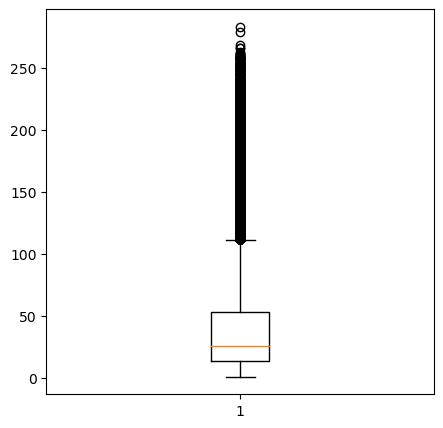

In [8]:
fig,ax = plt.subplots(figsize=(5,5))
plt.boxplot(df_train_1.phrase_len)
plt.show()

From the above box plot, some of the reviews are way more than 100 chracters long.

In [9]:
df_train_1[df_train_1.phrase_len > 100].head()

,Phrase,Sentiment,phrase_len
0,A series of escapades demonstrating the adage ...,1,188
27,"is also good for the gander , some of which oc...",2,110
28,"is also good for the gander , some of which oc...",2,108
116,A positively thrilling combination of ethnogra...,3,152
117,A positively thrilling combination of ethnogra...,4,150


In [10]:
df_train_1[df_train_1.phrase_len > 100].loc[0].Phrase

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

## <a id='1.4'>1.4 Creating Word Cloud of negative and positive movie reviews</a>

### Word Cloud


A word cloud is a graphical representation of frequently used words in a collection of text files. The height of each word in this picture is an indication of frequency of occurrence of the word in the entire text. Such diagrams are very useful when doing text analytics.

It provides a general idea of what kind of words are frequent in the corpus, in a sort of quick and dirty way.

Let's start doing some EDA on text data by Word Cloud.

## <a id='1.4.1'>1.4.1 Filtering out positive and negative movie reviews</a>

In [11]:
neg_phrases = df_train_1[df_train_1.Sentiment == 0]
neg_words = []
for t in neg_phrases.Phrase:
    neg_words.append(t)
neg_words[:4]

['would have a hard time sitting through this one',
 'have a hard time sitting through this one',
 'Aggressive self-glorification and a manipulative whitewash',
 'self-glorification and a manipulative whitewash']

**pandas.Series.str.cat ** : Concatenate strings in the Series/Index with given separator. Here we give a space as separator, so, it will concatenate all the strings in each of the index separated by a space.

In [12]:
neg_text = pd.Series(neg_words).str.cat(sep=' ')
neg_text[:100]

'would have a hard time sitting through this one have a hard time sitting through this one Aggressive'

In [13]:
for t in neg_phrases.Phrase[:300]:
    if 'good' in t:
        print(t)

's not a particularly good film
covers huge , heavy topics in a bland , surfacey way that does n't offer any insight into why , for instance , good things happen to bad people .
huge , heavy topics in a bland , surfacey way that does n't offer any insight into why , for instance , good things happen to bad people
a bland , surfacey way that does n't offer any insight into why , for instance , good things happen to bad people


So, we can very well see, even if the texts contain words like "good", it is a negative sentiment because it indicates that the movie is **NOT** a good movie. 

In [14]:
pos_phrases = df_train_1[df_train_1.Sentiment == 4] ## 4 is positive sentiment
pos_string = []
for t in pos_phrases.Phrase:
    pos_string.append(t)
pos_text = pd.Series(pos_string).str.cat(sep=' ')
pos_text[:100]
    

'This quiet , introspective and entertaining independent is worth seeking . quiet , introspective and'

## <a id='1.4.2'>1.4.2 Word Cloud for negatively classified movie reviews</a>

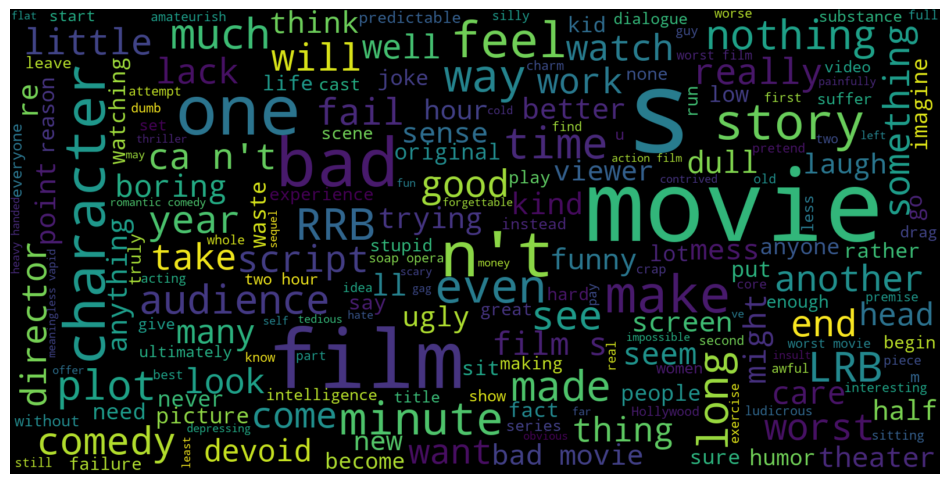

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Some of the big words can be interpreted quite neutral, such as "movie","film", etc. We can see some of the words in smaller size make sense to be in negative movie reviews like "bad cinema", "annoying", "dull", etc.

However, there are some words like "good" is also present in the negatively classified sentiment about the movie.
Let's go deeper into such words/texts:

## <a id='1.4.3'>1.4.3 Word Cloud for positively classified movie reviews</a>

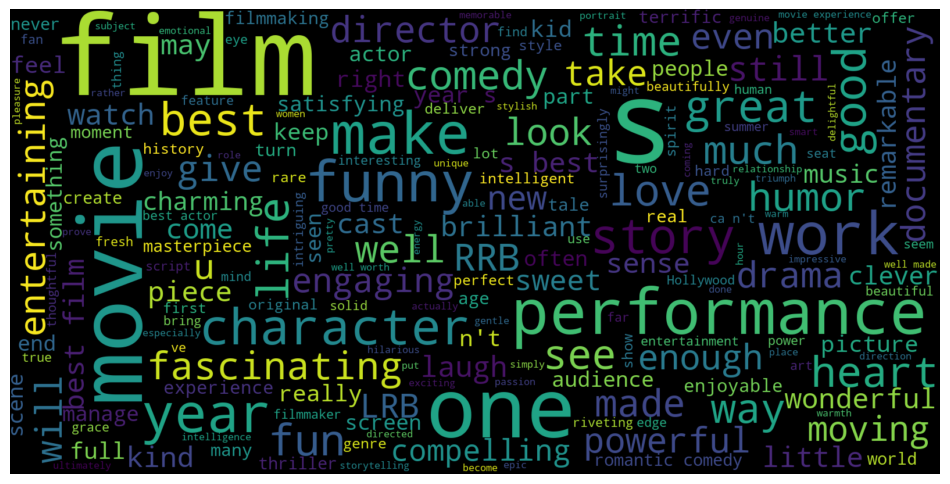

In [16]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(pos_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Again I see some neutral words in big size, "movie","film", but positive words like "good", "best", "fascinating" also stand out.

## <a id='1.5'>1.5 Term Frequencies of each Sentiment class</a>

We need the Term Frequency data to see what kind of words are used in the movie reviews and how many times have been used.
Let's proceed with CountVectorizer to calculate term frequencies:


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cvector = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range=(1,2))
cvector.fit(df_train_1.Phrase)

CountVectorizer(min_df=0.0, ngram_range=(1, 2))

In [19]:
cvector

CountVectorizer(min_df=0.0, ngram_range=(1, 2))

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

len(cvector.get_feature_names_out())

94644

It looks like count vectorizer has extracted 94644 words out of the corpus.
Getting term frequency for each class can be obtained with the below code block.

## <a id='1.5.1'>1.5.1 Term Frequency for 'negative' sentiments</a>

In [22]:
neg_matrix = cvector.transform(df_train_1[df_train_1.Sentiment == 0].Phrase)
som_neg_matrix = cvector.transform(df_train_1[df_train_1.Sentiment == 1].Phrase)
neu_matrix = cvector.transform(df_train_1[df_train_1.Sentiment == 2].Phrase)
som_pos_matrix = cvector.transform(df_train_1[df_train_1.Sentiment == 3].Phrase)
pos_matrix = cvector.transform(df_train_1[df_train_1.Sentiment == 4].Phrase)


In [23]:
neg_words = neg_matrix.sum(axis=0)
neg_words_freq = [(word, neg_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
neg_tf = pd.DataFrame(list(sorted(neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','negative'])

In [24]:
neg_tf.head()

,Terms,negative
0,the,3462
1,and,2549
2,of,2277
3,to,1916
4,is,1372


In [25]:
neg_tf_df = neg_tf.set_index('Terms')
neg_tf_df.head()

,negative
Terms,
the,3462
and,2549
of,2277
to,1916
is,1372


## <a id='1.5.2'>1.5.2 Term Frequency for 'some negative' sentiments</a>

In [26]:

som_neg_words = som_neg_matrix.sum(axis=0)
som_neg_words_freq = [(word, som_neg_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
som_neg_tf = pd.DataFrame(list(sorted(som_neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','some-negative'])
som_neg_tf_df = som_neg_tf.set_index('Terms')
som_neg_tf_df.head()

,some-negative
Terms,
the,10885
of,6660
and,6204
to,5571
is,3362


## <a id='1.5.3'>1.5.3 Term Frequency for 'neutral' sentiments</a>

In [27]:

neu_words = neu_matrix.sum(axis=0)
neu_words_freq = [(word, neu_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
neu_words_tf = pd.DataFrame(list(sorted(neu_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','neutral'])
neu_words_tf_df = neu_words_tf.set_index('Terms')
neu_words_tf_df.head()

,neutral
Terms,
the,20619
of,12287
and,10241
to,8295
in,5562


## <a id='1.5.4'>1.5.4 Term Frequency for 'some positive' sentiments</a>

In [28]:

som_pos_words = som_pos_matrix.sum(axis=0)
som_pos_words_freq = [(word, som_pos_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
som_pos_words_tf = pd.DataFrame(list(sorted(som_pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','some-positive'])
som_pos_words_tf_df = som_pos_words_tf.set_index('Terms')
som_pos_words_tf_df.head()

,some-positive
Terms,
the,12459
and,9180
of,8405
to,5411
is,3489


## <a id='1.5.5'>1.5.5 Term Frequency for 'positive' sentiments</a>


In [29]:

pos_words = pos_matrix.sum(axis=0)
pos_words_freq = [(word, pos_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
pos_words_tf = pd.DataFrame(list(sorted(pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','positive'])
pos_words_tf_df = pos_words_tf.set_index('Terms')
pos_words_tf_df.head()

,positive
Terms,
the,4208
and,4003
of,3073
to,1568
is,1550


In [30]:
term_freq_df = pd.concat([neg_tf_df,som_neg_tf_df,neu_words_tf_df,som_pos_words_tf_df,pos_words_tf_df],axis=1)

## <a id='1.6'>1.6 Total Term Frequency of all the 5 sentiment classes</a>

In [31]:
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['some-negative'] \
                                 + term_freq_df['neutral'] + term_freq_df['some-positive'] \
                                 +  term_freq_df['positive'] 
term_freq_df.sort_values(by='total', ascending=False).head(20)

,negative,some-negative,neutral,some-positive,positive,total
Terms,,,,,,
the,3462,10885,20619,12459,4208,51633
of,2277,6660,12287,8405,3073,32702
and,2549,6204,10241,9180,4003,32177
to,1916,5571,8295,5411,1568,22761
in,1038,2965,5562,3365,1067,13997
is,1372,3362,3703,3489,1550,13476
that,1139,2982,3677,3280,1260,12338
it,1086,3067,3791,2927,863,11734
as,757,2184,2941,2037,732,8651


## <a id='1.7'>1.7 Frequency plot of top frequent 500 phrases in movie reviews</a>

Text(0.5, 1.0, 'Top 500 phrases in movie reviews')

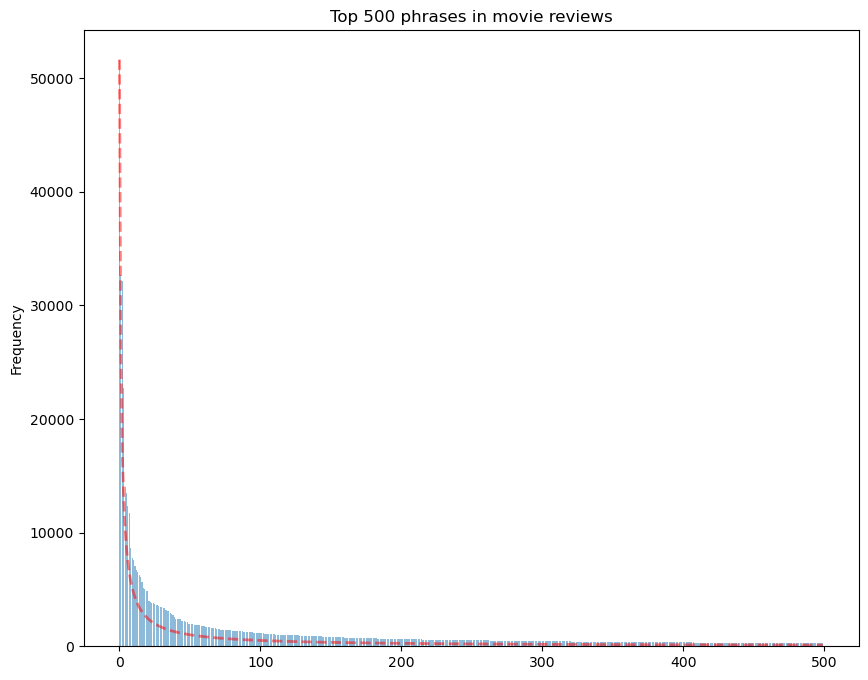

In [32]:
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 phrases in movie reviews')

On the X-axis is the rank of the frequency from highest rank from left up to 500th rank to the right. Y-axis is the frequency observed in the corpus.

Another way to plot this is on a log-log graph, with X-axis being log(rank), Y-axis being log(frequency). By plotting on the log-log scale the result will yield roughly linear line on the graph.

## <a id='1.8'>1.8 Plot of Absolute frequency of phrases against their rank</a>

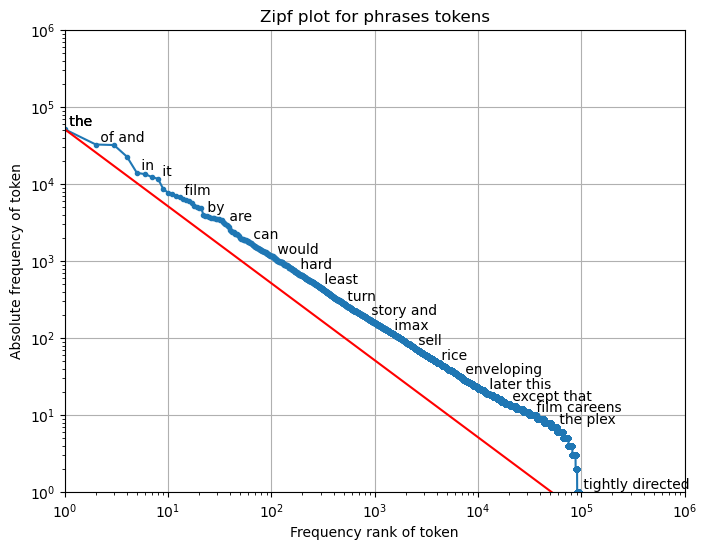

In [33]:
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for phrases tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

We can clearly see that words like "the", "in","it", etc are much higher in frequency but has been ranked less as they don't have any significance regarding the sentiment of the movie review. On the other hand, some words like "downbeat laughably" have been given higher rank as they are very less frequent in the document and seems to be significant related to the sentiment of a movie.

## <a id='1.9'>1.9 Movie Reviews Tokens Visualisation</a>

Next, let's explore about how different the tokens in two different classes(positive, negative).

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(df_train_1.Phrase)

CountVectorizer(max_features=10000, stop_words='english')

In [35]:
neg_matrix = cvec.transform(df_train_1[df_train_1.Sentiment == 0].Phrase)
som_neg_matrix = cvec.transform(df_train_1[df_train_1.Sentiment == 1].Phrase)
neu_matrix = cvec.transform(df_train_1[df_train_1.Sentiment == 2].Phrase)
som_pos_matrix = cvec.transform(df_train_1[df_train_1.Sentiment == 3].Phrase)
pos_matrix = cvec.transform(df_train_1[df_train_1.Sentiment == 4].Phrase)

neg_words = neg_matrix.sum(axis=0)
neg_words_freq = [(word, neg_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
neg_tf = pd.DataFrame(list(sorted(neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','negative'])

neg_tf_df = neg_tf.set_index('Terms')


som_neg_words = som_neg_matrix.sum(axis=0)
som_neg_words_freq = [(word, som_neg_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
som_neg_tf = pd.DataFrame(list(sorted(som_neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','some-negative'])
som_neg_tf_df = som_neg_tf.set_index('Terms')

neu_words = neu_matrix.sum(axis=0)
neu_words_freq = [(word, neu_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
neu_words_tf = pd.DataFrame(list(sorted(neu_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','neutral'])
neu_words_tf_df = neu_words_tf.set_index('Terms')

som_pos_words = som_pos_matrix.sum(axis=0)
som_pos_words_freq = [(word, som_pos_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
som_pos_words_tf = pd.DataFrame(list(sorted(som_pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','some-positive'])
som_pos_words_tf_df = som_pos_words_tf.set_index('Terms')

pos_words = pos_matrix.sum(axis=0)
pos_words_freq = [(word, pos_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
pos_words_tf = pd.DataFrame(list(sorted(pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','positive'])
pos_words_tf_df = pos_words_tf.set_index('Terms')

term_freq_df = pd.concat([neg_tf_df,som_neg_tf_df,neu_words_tf_df,som_pos_words_tf_df,pos_words_tf_df],axis=1)

term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['some-negative'] \
                                 + term_freq_df['neutral'] + term_freq_df['some-positive'] \
                                 +  term_freq_df['positive'] 
        
term_freq_df.sort_values(by='total', ascending=False).head(15)

,negative,some-negative,neutral,some-positive,positive,total
Terms,,,,,,
film,480,1281,2175,1848,949,6733
movie,793,1463,2054,1344,587,6241
like,332,942,1167,599,150,3190
story,153,532,954,664,236,2539
rrb,131,498,1112,551,146,2438
good,100,334,519,974,334,2261
lrb,119,452,878,512,137,2098
time,153,420,752,464,130,1919
characters,167,455,614,497,149,1882


## <a id='1.9.1'>1.9.1 Plot of top frequently used 50 phrases in negative movie reviews</a>

Text(0.5, 1.0, 'Top 50 tokens in negative movie reviews')

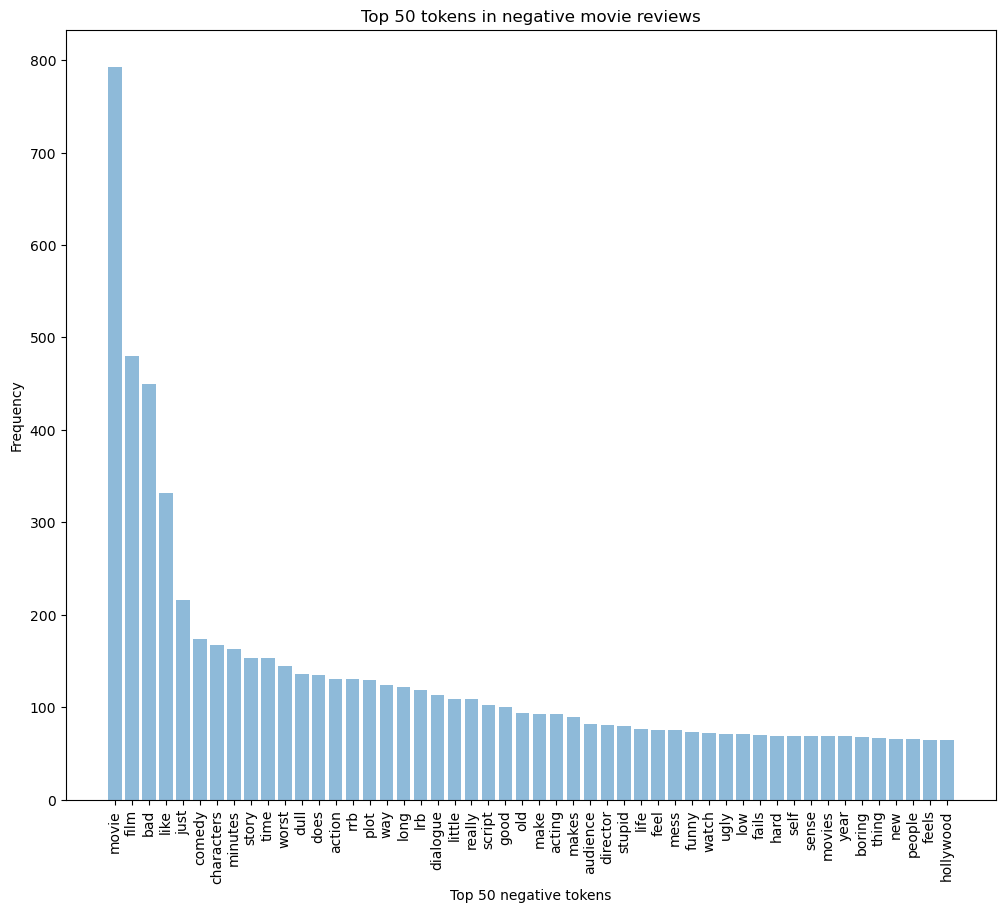

In [36]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative movie reviews')

We can see some negative words like "bad", "worst", "dull" are some of the high frequency words. But, there exists few neutral words like "movie", "film", "minutes" dominating the frequency plots.

Let's also take a look at top 50 positive tokens on a bar chart.

## <a id='1.9.2'>1.9.2 Plot of top frequently used 50 phrases in positive movie reviews</a>

Text(0.5, 1.0, 'Top 50 tokens in positive movie reviews')

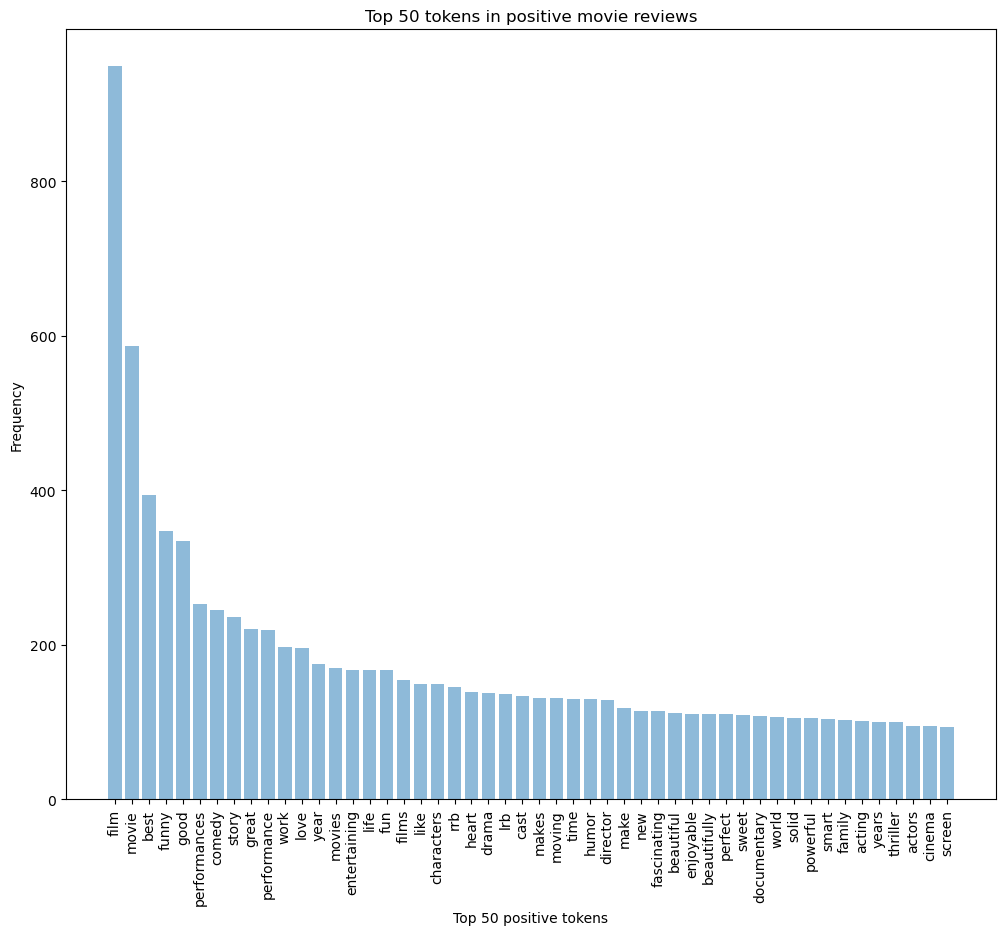

In [37]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive movie reviews')

Once again, there are some neutral words like "film", "movie", are quite high up in the rank.

## <a id='2'>2. Traditional Supervised Machine Learning Models</a>


## <a id='2.1'>2.1 Feature Engineering</a>

In [38]:
phrase = np.array(df_train_1['Phrase'])
sentiments = np.array(df_train_1['Sentiment'])
# build train and test datasets

from sklearn.model_selection import train_test_split    
phrase_train, phrase_test, sentiments_train, sentiments_test = train_test_split(phrase, sentiments, test_size=0.2, random_state=4)

Next, we will try to see how different are the tokens in 4 different classes(positive,some positive,neutral, some negative, negative). 

## <a id='2.2'>2.2 Implementation of CountVectorizer & TF-IDF

## <a id='2.2.1'>2.2.1 CountVectorizer</a>



As we all know, all machine learning algorithms are good with numbers; we have to extract or convert the text data into numbers without losing much of the information.
One way to do such transformation is Bag-Of-Words (BOW) which gives a number to each word but that is very inefficient.
So, a way to do it is by **CountVectorizer**: it counts the number of words in the document i.e it converts a collection of text documents to a matrix of the counts of occurences of each word in the document. 

For Example: If we have a collection of 3 text documents as below, then CountVectorizer converts that into individual counts of occurences of each of the words in the document as below:




In [39]:
cv1 = CountVectorizer()
x_traincv = cv1.fit_transform(["Hi How are you How are you doing","Hi what's up","Wow that's awesome"])

In [47]:
x_traincv_df = pd.DataFrame(x_traincv.toarray(),columns=list(cv1.get_feature_names_out()))
x_traincv_df

,are,awesome,doing,hi,how,that,up,what,wow,you
0,2,0,1,1,2,0,0,0,0,2
1,0,0,0,1,0,0,1,1,0,0
2,0,1,0,0,0,1,0,0,1,0


Now, in case of CountVectorizer, we are just counting the number of words in the document and many times it happens that some words like "are","you","hi",etc are very large in numbers and that would dominate our results in machinelearning algorithm.

## <a id='2.2.5'>2.2.5 Setting the parameters of CountVectorizer</a>

**For CountVectorizer**
This time, the stop words will not help much, because of the same high-frequency words, such as "the", "to", will equally frequent in both classes. If these stop words dominate both of the classes, I won't be able to have a meaningful result. So, I decided to remove stop words, and also will limit the max_features to 10,000 with countvectorizer.

In [48]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Build Bag-Of-Words on train phrases
cv = CountVectorizer(stop_words='english',max_features=10000)
cv_train_features = cv.fit_transform(phrase_train)

In [49]:

# build TFIDF features on train reviews
tv = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(phrase_train)

In [50]:
# transform test reviews into features
cv_test_features = cv.transform(phrase_test)
tv_test_features = tv.transform(phrase_test)

In [51]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

BOW model:> Train features shape: (124848, 10000)  Test features shape: (31212, 10000)
TFIDF model:> Train features shape: (124848, 93697)  Test features shape: (31212, 93697)


## <a id='2.3'>2.3 Model Training, Prediction and Performance Evaluation</a>

In [52]:
####Evaluation metrics


from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_curve, auc 


def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
                        

def train_predict_model(classifier, 
                        train_features, train_labels, 
                        test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions    


def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  labels=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], 
                                                labels=level_labels)) 
    print(cm_frame) 
    
def display_classification_report(true_labels, predicted_labels, classes=[1,0]):

    report = metrics.classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
                                           labels=classes) 
    print(report)
    
    
    
def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, 
                                  classes=classes)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, 
                             classes=classes)


def plot_model_decision_surface(clf, train_features, train_labels,
                                plot_step=0.02, cmap=plt.cm.RdYlBu,
                                markers=None, alphas=None, colors=None):
    
    if train_features.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = train_features[:, 0].min() - plot_step, train_features[:, 0].max() + plot_step
    y_min, y_max = train_features[:, 1].min() - plot_step, train_features[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf_est = clone(clf)
    clf_est.fit(train_features,train_labels)
    if hasattr(clf_est, 'predict_proba'):
        Z = clf_est.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf_est.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap)
    
    le = LabelEncoder()
    y_enc = le.fit_transform(train_labels)
    n_classes = len(le.classes_)
    plot_colors = ''.join(colors) if colors else [None] * n_classes
    label_names = le.classes_
    markers = markers if markers else [None] * n_classes
    alphas = alphas if alphas else [None] * n_classes
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_enc == i)
        plt.scatter(train_features[idx, 0], train_features[idx, 1], c=color,
                    label=label_names[i], cmap=cmap, edgecolors='black', 
                    marker=markers[i], alpha=alphas[i])
    plt.legend()
    plt.show()


def plot_model_roc_curve(clf, features, true_labels, label_encoder=None, class_names=None):
    
    ## Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    if hasattr(clf, 'classes_'):
        class_labels = clf.classes_
    elif label_encoder:
        class_labels = label_encoder.classes_
    elif class_names:
        class_labels = class_names
    else:
        raise ValueError('Unable to derive prediction classes, please specify class_names!')
    n_classes = len(class_labels)
    y_test = label_binarize(true_labels, classes=class_labels)
    if n_classes == 2:
        if hasattr(clf, 'predict_proba'):
            prob = clf.predict_proba(features)
            y_score = prob[:, prob.shape[1]-1] 
        elif hasattr(clf, 'decision_function'):
            prob = clf.decision_function(features)
            y_score = prob[:, prob.shape[1]-1]
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
        
        fpr, tpr, _ = roc_curve(y_test, y_score)      
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='ROC curve (area = {0:0.2f})'
                                 ''.format(roc_auc),
                 linewidth=2.5)
        
    elif n_classes > 2:
        if hasattr(clf, 'predict_proba'):
            y_score = clf.predict_proba(features)
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        ## Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        ## Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        ## Plot ROC curves
        plt.figure(figsize=(6, 4))
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]), linewidth=3)

        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]), linewidth=3)

        for i, label in enumerate(class_labels):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                           ''.format(label, roc_auc[i]), 
                     linewidth=2, linestyle=':')
    else:
        raise ValueError('Number of classes should be atleast 2 or more')
        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [53]:
from sklearn.linear_model import SGDClassifier, LogisticRegression

lr = LogisticRegression(penalty='l2', max_iter=100, C=1)
sgd = SGDClassifier(loss='hinge', n_iter=100)

TypeError: __init__() got an unexpected keyword argument 'n_iter'

## <a id='2.3.1'>2.3.1 Logistic Regression model on CountVectorizer</a>

In [41]:
# Logistic Regression model on BOW features
lr_bow_predictions = train_predict_model(classifier=lr, 
                                             train_features=cv_train_features, train_labels=sentiments_train,
                                             test_features=cv_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=lr_bow_predictions,
                                      classes=[0,1,2,3,4])
                                    

NameError: name 'train_predict_model' is not defined

## <a id='2.3.2'>2.3.2 Logistic Regression model on TF-IDF features</a>


In [42]:
# Logistic Regression model on TF-IDF features
lr_tfidf_predictions = train_predict_model(classifier=lr, 
                                               train_features=tv_train_features, train_labels=sentiments_train,
                                               test_features=tv_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=lr_tfidf_predictions,
                                      classes=[0,1,2,3,4])

NameError: name 'train_predict_model' is not defined


## <a id='2.3.3'>2.3.3 SGD model on Countvectorizer</a>

In [43]:
# SGD model on Countvectorizer
sgd_bow_predictions = train_predict_model(classifier=sgd, 
                                             train_features=cv_train_features, train_labels=sentiments_train,
                                             test_features=cv_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=sgd_bow_predictions,
                                      classes=[0,1,2,3,4])

NameError: name 'train_predict_model' is not defined

## <a id='2.3.4'>2.3.4 SGD model on TF-IDF</a>

In [44]:
# SGD model on TF-IDF
sgd_tfidf_predictions = train_predict_model(classifier=sgd, 
                                                train_features=tv_train_features, train_labels=sentiments_train,
                                                test_features=tv_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=sgd_tfidf_predictions,
                                      classes=[0,1,2,3,4])

NameError: name 'train_predict_model' is not defined

## <a id='2.3.5'>2.3.5 RandomForest model on TF-IDF</a>

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1)

In [46]:
# RandomForest model on TF-IDF
rfc_tfidf_predictions = train_predict_model(classifier=rfc, 
                                                train_features=tv_train_features, train_labels=sentiments_train,
                                                test_features=tv_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=rfc_tfidf_predictions,
                                      classes=[0,1,2,3,4])

NameError: name 'train_predict_model' is not defined

**Logistic Regression on TF-IDF is outperforming other machine learning algorithms**. 

